<a href="https://colab.research.google.com/github/cesarbrea/hello_world/blob/master/Salinas_Wind.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# trying to get average wind speed by hour in knots for December 2022-24 for Salinas Ecuador
# Code from ChatGPT 5 https://chatgpt.com/share/68b9dbe3-fc7c-8004-aa02-6671bc7c94eb (with all the gory error resolution)
# data from CLimate Data Store https://cds.climate.copernicus.eu/

In [ ]:
# The Climate Data Store https://cds.climate.copernicus.eu/ provides API access to the necessary data.
# The .cdsapirc file stores the API URL and my API key.
# I get the url and API key from my profile on my Climate Data Store Account
# I copy them into a cdsapirc.txt file on my Mac
# I run this cell to upload the file, put it in the right place for Colab notebook, and then convert it to the required .cdsapirc format

from google.colab import files

# Step 1. Upload the cdsapirc.txt file
uploaded = files.upload()

# Step 2. Move it to the correct location
import os
if "cdsapirc.txt" in uploaded:
    os.rename("cdsapirc.txt", "/root/.cdsapirc")
    print("Moved to /root/.cdsapirc")

# Step 3. Verify contents
!cat /root/.cdsapirc



In [37]:
pip install cdsapi xarray pandas


In [27]:
import cdsapi
import xarray as xr
import pandas as pd
from datetime import timedelta

# Initialize client
c = cdsapi.Client()

# Geographic box for Salinas (small box around the point)
# the values are S latitude and W longitude
area = [ -2.0, -81.2, -2.5, -80.7 ]  # North, West, South, East

# Download ERA5 hourly reanalysis for 2022-2024, December only
for year in [2022, 2023, 2024]:
    c.retrieve(
        'reanalysis-era5-single-levels',
        {
            'product_type': 'reanalysis',
            'variable': ['10m_u_component_of_wind', '10m_v_component_of_wind'],
            'year': str(year),
            'month': '12',
            'day': [f"{d:02d}" for d in range(1, 32)],
            'time': [f"{h:02d}:00" for h in range(24)],
            'area': area,
            'format': 'netcdf'
        },
        f"era5_salinas_{year}_dec.nc"
    )


2025-09-04 17:02:01,759 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
INFO:ecmwf.datastores.legacy_client:[2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-09-04 17:02:02,304 INFO Request ID is 51dddfa7-ee8b-4260-b310-b55cd92fca16
INFO:ecmwf.datastores.legacy_client:Request ID is 51dddfa7-ee8b-4260-b310-b55cd92fca16
2025-09-04 17:02:02,469 INFO status has been updated to accepted
INFO:ecmwf.datastores.legacy_client:status has been updated to accepted
2025-09-04 17:02:16,505 INFO status has been updated to running
INFO:ecmwf.datastores.legacy_client:status has been updated to running
2025-09-04 17:03:19,274 INFO status has been updated to successful
INFO:ecmwf.datastores.legacy_client:status has been updated to successful


fb03119665c153c288f82f1bbdb95d5f.nc:   0%|          | 0.00/121k [00:00<?, ?B/s]

2025-09-04 17:03:21,653 INFO Request ID is e7411793-5c81-4991-89d4-645490102cc2
INFO:ecmwf.datastores.legacy_client:Request ID is e7411793-5c81-4991-89d4-645490102cc2
2025-09-04 17:03:21,816 INFO status has been updated to accepted
INFO:ecmwf.datastores.legacy_client:status has been updated to accepted
2025-09-04 17:03:43,572 INFO status has been updated to running
INFO:ecmwf.datastores.legacy_client:status has been updated to running
2025-09-04 17:04:38,528 INFO status has been updated to successful
INFO:ecmwf.datastores.legacy_client:status has been updated to successful


fbc4a6fdf22690b3130422239e111660.nc:   0%|          | 0.00/121k [00:00<?, ?B/s]

2025-09-04 17:04:41,017 INFO Request ID is 22b5a130-015b-453a-b18d-b8975e58bdc0
INFO:ecmwf.datastores.legacy_client:Request ID is 22b5a130-015b-453a-b18d-b8975e58bdc0
2025-09-04 17:04:41,180 INFO status has been updated to accepted
INFO:ecmwf.datastores.legacy_client:status has been updated to accepted
2025-09-04 17:04:55,266 INFO status has been updated to running
INFO:ecmwf.datastores.legacy_client:status has been updated to running
2025-09-04 17:06:36,426 INFO status has been updated to successful
INFO:ecmwf.datastores.legacy_client:status has been updated to successful


ac23def5a535a5568f9d234817ddd688.nc:   0%|          | 0.00/121k [00:00<?, ?B/s]

In [33]:
ds = xr.open_dataset("era5_salinas_2022_dec.nc")
print("Vars:", list(ds.data_vars))
print("Coords:", list(ds.coords))
print(ds)


Vars: ['u10', 'v10']
Coords: ['number', 'valid_time', 'latitude', 'longitude', 'expver']
<xarray.Dataset> Size: 71kB
Dimensions:     (valid_time: 744, latitude: 3, longitude: 3)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 6kB 2022-12-01 ... 2022-12-31T23:...
  * latitude    (latitude) float64 24B -2.0 -2.25 -2.5
  * longitude   (longitude) float64 24B -81.2 -80.95 -80.7
    expver      (valid_time) <U4 12kB ...
Data variables:
    u10         (valid_time, latitude, longitude) float32 27kB ...
    v10         (valid_time, latitude, longitude) float32 27kB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-09-04T17:03 GRIB to CDM+CF via cfgrib-0.9.1...


In [34]:
import xarray as xr, numpy as np, pandas as pd
from datetime import timedelta

def hourly_local_means(nc_path, year, utc_offset_hours=-5):
    ds = xr.open_dataset(nc_path)

    # Pick variables present in your file
    u = ds["u10"]
    v = ds["v10"]

    # Some ERA5 files include an 'expver' dimension; if so, average over it
    if "expver" in u.dims:
        u = u.mean("expver")
        v = v.mean("expver")

    # Wind speed (m/s)
    wspd = np.hypot(u, v).rename("wspd")

    # Spatial mean over the small 3x3 box → 1D time series on 'valid_time'
    wspd_ts = wspd.mean(dim=("latitude", "longitude"))

    # Convert to a pandas Series indexed by 'valid_time'
    s = wspd_ts.to_series()  # index is valid_time, values are wspd

    # Shift UTC → local (UTC-5 for Salinas)
    s_local = s.copy()
    s_local.index = s_local.index + pd.to_timedelta(utc_offset_hours, unit="h")

    # Keep just December of the requested year
    s_local = s_local[(s_local.index.year == year) & (s_local.index.month == 12)]

    # Average by local clock hour (00–23)
    out = s_local.groupby(s_local.index.hour).mean().round(2)
    out.name = year
    out.index.name = "Hour (Local Time)"
    return out

# Build the table for 2022–2024
years = [2022, 2023, 2024]
series = [hourly_local_means(f"era5_salinas_{y}_dec.nc", y) for y in years]
hourly_table = pd.concat(series, axis=1)
hourly_table.index.name = "Hour (Local Time)"
hourly_table  # m/s; multiply by 3.6 for km/h


,2022,2023,2024
Hour (Local Time),,,
0,3.95,4.32,4.24
1,3.99,4.30,4.22
2,3.98,4.24,4.17
3,3.95,4.15,4.11
4,3.89,4.07,3.96
5,3.65,4.02,3.35
6,3.67,3.84,3.29
7,3.66,3.71,3.29
8,3.63,3.65,3.26


from matplotlib import pyplot as plt
hourly_table[2022].plot(kind='hist', bins=20, title=2022)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
hourly_table[2023].plot(kind='hist', bins=20, title=2023)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
hourly_table[2024].plot(kind='hist', bins=20, title=2024)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
hourly_table.plot(kind='scatter', x=2022, y=2023, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
hourly_table.plot(kind='scatter', x=2023, y=2024, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
hourly_table[2022].plot(kind='line', figsize=(8, 4), title=2022)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
hourly_table[2023].plot(kind='line', figsize=(8, 4), title=2023)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
hourly_table[2024].plot(kind='line', figsize=(8, 4), title=2024)
plt.gca().spines[['top', 'right']].set_visible(False)

In [35]:
hourly_table.to_csv('/content/salinas_dec_hourly_wind_2022_2024_mps.csv')
(hourly_table * 3.6).round(2).to_csv('/content/salinas_dec_hourly_wind_2022_2024_kmh.csv')


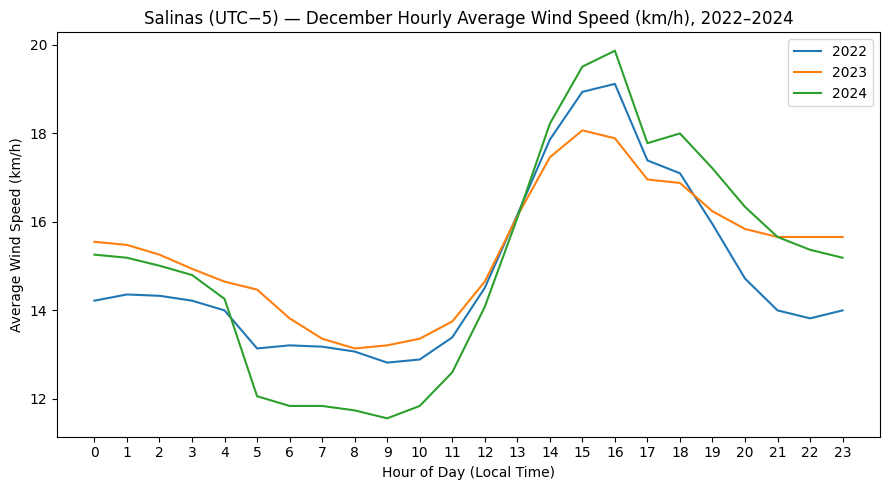

,2022,2023,2024
Hour (Local Time),,,
0,14.22,15.55,15.26
1,14.36,15.48,15.19
2,14.33,15.26,15.01
3,14.22,14.94,14.80
4,14.00,14.65,14.26
5,13.14,14.47,12.06
6,13.21,13.82,11.84
7,13.18,13.36,11.84
8,13.07,13.14,11.74


'/content/salinas_dec_hourly_wind_plot_kmh.png'

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# Load the CSV the user provided
path = "/content/salinas_dec_hourly_wind_2022_2024_kmh.csv"
df = pd.read_csv(path, index_col=0)

# Ensure the index is numeric hour (0-23) and sorted
df.index = df.index.astype(int)
df = df.sort_index()

# Create a single plot (no subplots), using matplotlib and no specified colors
plt.figure(figsize=(9, 5))
for col in df.columns:
    plt.plot(df.index, df[col], label=str(col))

plt.title("Salinas (UTC−5) — December Hourly Average Wind Speed (km/h), 2022–2024")
plt.xlabel("Hour of Day (Local Time)")
plt.ylabel("Average Wind Speed (km/h)")
plt.xticks(range(0, 24))
plt.legend()
plt.tight_layout()

# Save the figure so the user can download it
out_path = "/content/salinas_dec_hourly_wind_plot_kmh.png"
plt.savefig(out_path, dpi=200, bbox_inches="tight")
plt.show()

# Also display the table to the user for reference
display(df)

out_path

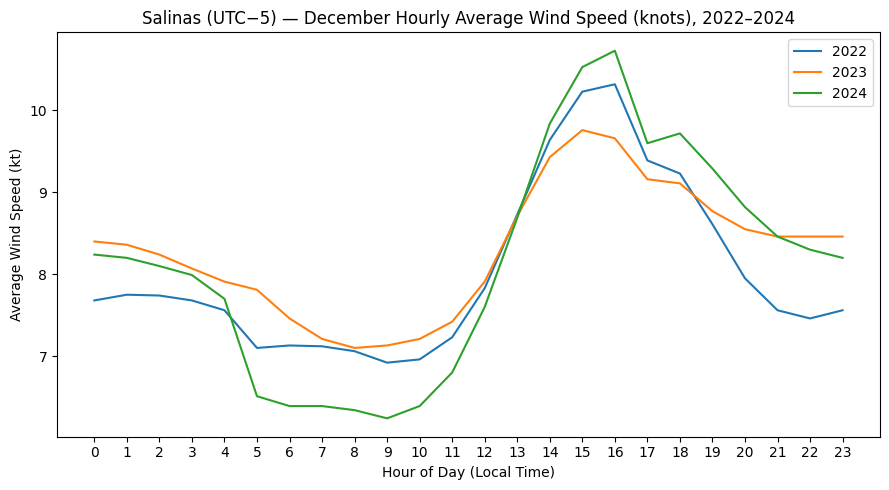

,2022,2023,2024
Hour (Local Time),,,
0,7.68,8.40,8.24
1,7.75,8.36,8.20
2,7.74,8.24,8.10
3,7.68,8.07,7.99
4,7.56,7.91,7.70
5,7.10,7.81,6.51
6,7.13,7.46,6.39
7,7.12,7.21,6.39
8,7.06,7.10,6.34


('/content/salinas_dec_hourly_wind_plot_knots.png',
 '/content/salinas_dec_hourly_wind_2022_2024_knots.csv')

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# Load the existing km/h CSV
kmh_path = "/content/salinas_dec_hourly_wind_2022_2024_kmh.csv"
df_kmh = pd.read_csv(kmh_path, index_col=0)

# Ensure index is 0-23 and sorted
df_kmh.index = df_kmh.index.astype(int)
df_kmh = df_kmh.sort_index()

# Convert km/h to knots (1 km/h = 0.5399568035 kn)
df_knots = (df_kmh * 0.5399568035).round(2)

# Plot using matplotlib (single plot, no specific colors)
plt.figure(figsize=(9, 5))
for col in df_knots.columns:
    plt.plot(df_knots.index, df_knots[col], label=str(col))

plt.title("Salinas (UTC−5) — December Hourly Average Wind Speed (knots), 2022–2024")
plt.xlabel("Hour of Day (Local Time)")
plt.ylabel("Average Wind Speed (kt)")
plt.xticks(range(0, 24))
plt.legend()
plt.tight_layout()

# Save the figure
png_path = "/content/salinas_dec_hourly_wind_plot_knots.png"
plt.savefig(png_path, dpi=200, bbox_inches="tight")
plt.show()

# Save the converted table as CSV and display to user
csv_knots_path = "/content/salinas_dec_hourly_wind_2022_2024_knots.csv"
df_knots.to_csv(csv_knots_path)

display(df_knots)

png_path, csv_knots_path

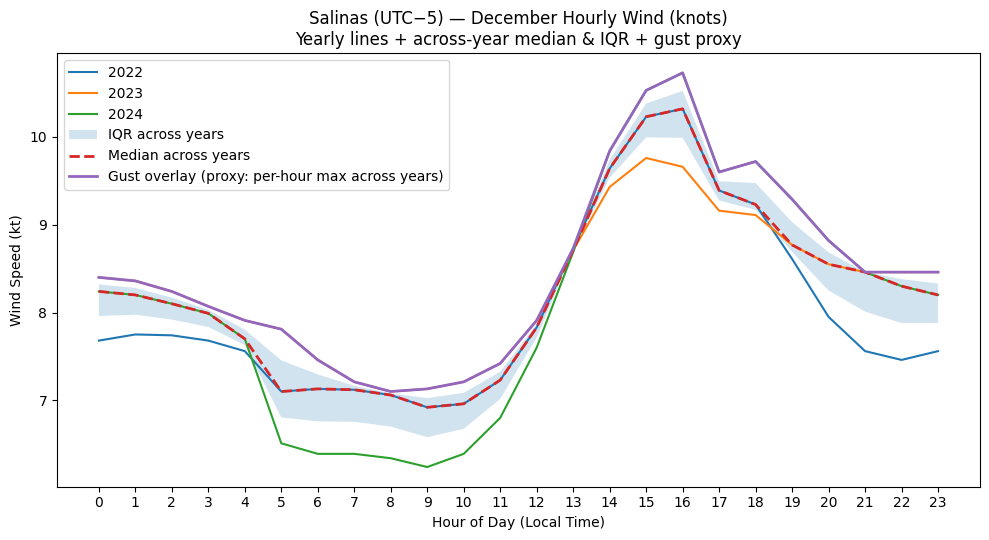

'/content/salinas_dec_hourly_wind_knots_median_iqr_gustproxy.png'

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

knots_csv = "/content/salinas_dec_hourly_wind_2022_2024_knots.csv"
df = pd.read_csv(knots_csv, index_col=0)
df.index = pd.to_numeric(df.index, errors="coerce")
df = df.apply(pd.to_numeric, errors="coerce")
df = df.dropna(how="all").sort_index()

# Across-year stats (with 3 years available)
median_series = df.median(axis=1)
q1_series = df.quantile(0.25, axis=1)
q3_series = df.quantile(0.75, axis=1)

# "Gust proxy": with no gust var present, use the per-hour max across years (transparent label in legend)
gust_proxy = df.max(axis=1)

plt.figure(figsize=(10, 5.5))
for col in df.columns:
    plt.plot(df.index, df[col], label=str(col))

# IQR shading & median
plt.fill_between(df.index.values.astype(float),
                 q1_series.values.astype(float),
                 q3_series.values.astype(float),
                 alpha=0.2, label="IQR across years")
plt.plot(df.index, median_series, linestyle="--", linewidth=2, label="Median across years")

# Gust overlay (proxy)
plt.plot(df.index, gust_proxy, linewidth=2, label="Gust overlay (proxy: per-hour max across years)")

plt.title("Salinas (UTC−5) — December Hourly Wind (knots)\nYearly lines + across-year median & IQR + gust proxy")
plt.xlabel("Hour of Day (Local Time)")
plt.ylabel("Wind Speed (kt)")
plt.xticks(range(0, 24))
plt.legend()
plt.tight_layout()

png_path = "/content/salinas_dec_hourly_wind_knots_median_iqr_gustproxy.png"
plt.savefig(png_path, dpi=200, bbox_inches="tight")
plt.show()

png_path
